In [25]:
from pyspark.sql import SparkSession
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('train_selected.csv')

In [38]:
# Binarize the numeric data
data_binary = data.applymap(lambda x: True if x != 0 else False)

# Apply Apriori algorithm
frequent_itemsets = apriori(data_binary, min_support=0.2, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


In [39]:
print("Number of association rules:", len(association_rules_df))


Number of association rules: 12882


In [28]:
association_rules_df.to_csv('association_rules.csv', index=False)

In [29]:
# Sort association rules by support in descending order
sorted_rules = association_rules_df.sort_values(by='support', ascending=False)

# Print top 10 rules sorted by support
print(sorted_rules.head(10).to_string())

                        antecedents                      consequents  antecedent support  consequent support   support  confidence  lift  leverage  conviction  zhangs_metric
0                       (URLLength)             (URLSimilarityIndex)            1.000000            1.000000  1.000000    1.000000   1.0       0.0         inf            0.0
1              (URLSimilarityIndex)                      (URLLength)            1.000000            1.000000  1.000000    1.000000   1.0       0.0         inf            0.0
63                        (IsHTTPS)  (URLLength, URLSimilarityIndex)            0.781949            1.000000  0.781949    1.000000   1.0       0.0         inf            0.0
13             (URLSimilarityIndex)                        (IsHTTPS)            1.000000            0.781949  0.781949    0.781949   1.0       0.0         1.0            0.0
12                        (IsHTTPS)             (URLSimilarityIndex)            0.781949            1.000000  0.781949    1.000000

In [30]:
# Sort association rules by support in descending order
sorted_rules = association_rules_df.sort_values(by='confidence', ascending=False)

# Print top 10 rules sorted by support
print(sorted_rules.head(10).to_string())

                                                                        antecedents                      consequents  antecedent support  consequent support   support  confidence  lift  leverage  conviction  zhangs_metric
0                                                                       (URLLength)             (URLSimilarityIndex)            1.000000                 1.0  1.000000         1.0   1.0       0.0         inf            0.0
6044           (HasDescription, HasCopyrightInfo, IsHTTPS, URLLength, HasSocialNet)             (URLSimilarityIndex)            0.286860                 1.0  0.286860         1.0   1.0       0.0         inf            0.0
5947                   (NoOfJS, label, HasDescription, HasCopyrightInfo, URLLength)             (URLSimilarityIndex)            0.343994                 1.0  0.343994         1.0   1.0       0.0         inf            0.0
5952                              (NoOfJS, label, HasDescription, HasCopyrightInfo)  (URLLength, URLSimilarityIn

In [31]:
# Sort association rules by support in descending order
sorted_rules = association_rules_df.sort_values(by='lift', ascending=False)

# Print top 10 rules sorted by support
print(sorted_rules.head(10).to_string(index=False))


                                                             antecedents                                                               consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
           (IsHTTPS, HasSocialNet, URLSimilarityIndex, HasCopyrightInfo)                                (NoOfJS, label, HasDescription, NoOfImage)            0.374173            0.413695 0.283759    0.758363 1.833145  0.128965    2.426387       0.726222
                               (IsHTTPS, HasSocialNet, HasCopyrightInfo)                                (NoOfJS, label, HasDescription, NoOfImage)            0.374173            0.413695 0.283759    0.758363 1.833145  0.128965    2.426387       0.726222
                    (IsHTTPS, HasSocialNet, URLLength, HasCopyrightInfo)            (NoOfJS, label, HasDescription, URLSimilarityIndex, NoOfImage)            0.374173            0.413695 0.283759    0.758363 1.833145  0.128965    2.426387

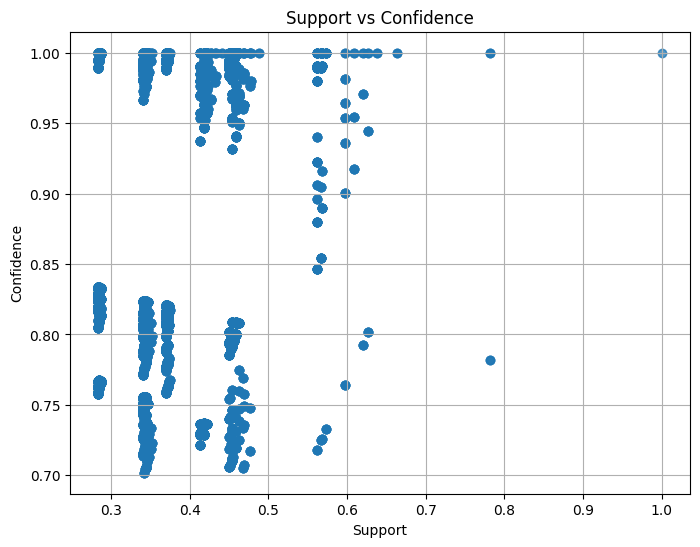

In [41]:
# Plot support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(association_rules_df['support'], association_rules_df['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


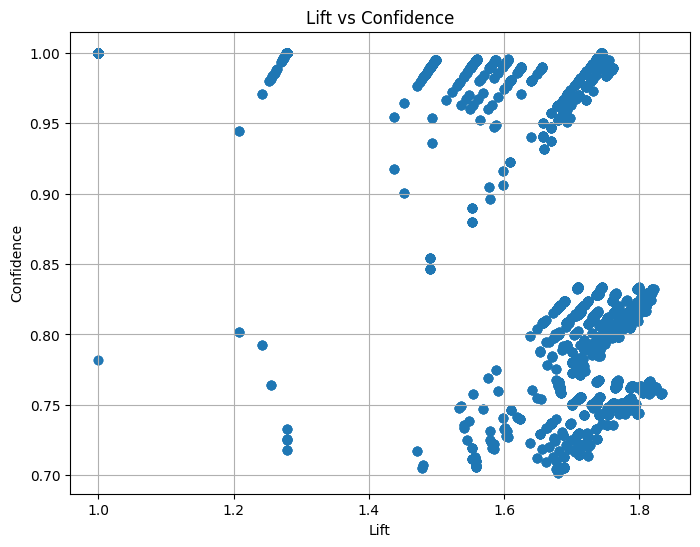

In [33]:


# Plot lift vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(association_rules_df['lift'], association_rules_df['confidence'], alpha=0.5)
plt.title('Lift vs Confidence')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


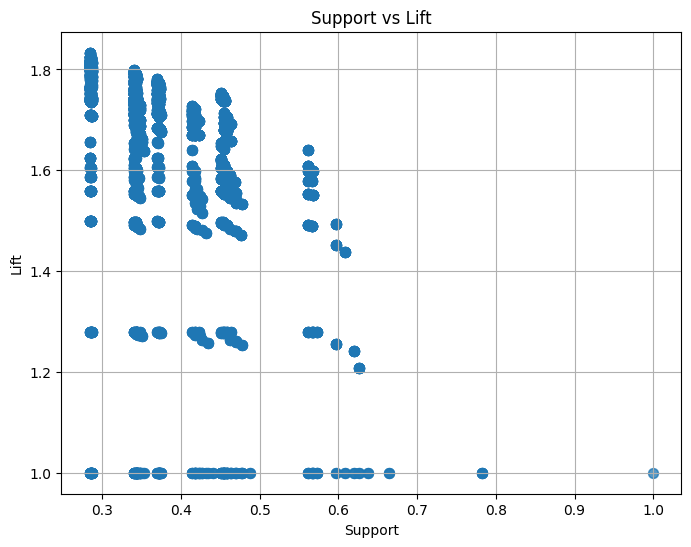

In [36]:
import matplotlib.pyplot as plt

# Plot support vs Lift
plt.figure(figsize=(8, 6))
plt.scatter(association_rules_df['support'], association_rules_df['lift'], alpha=0.5,s=50)
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


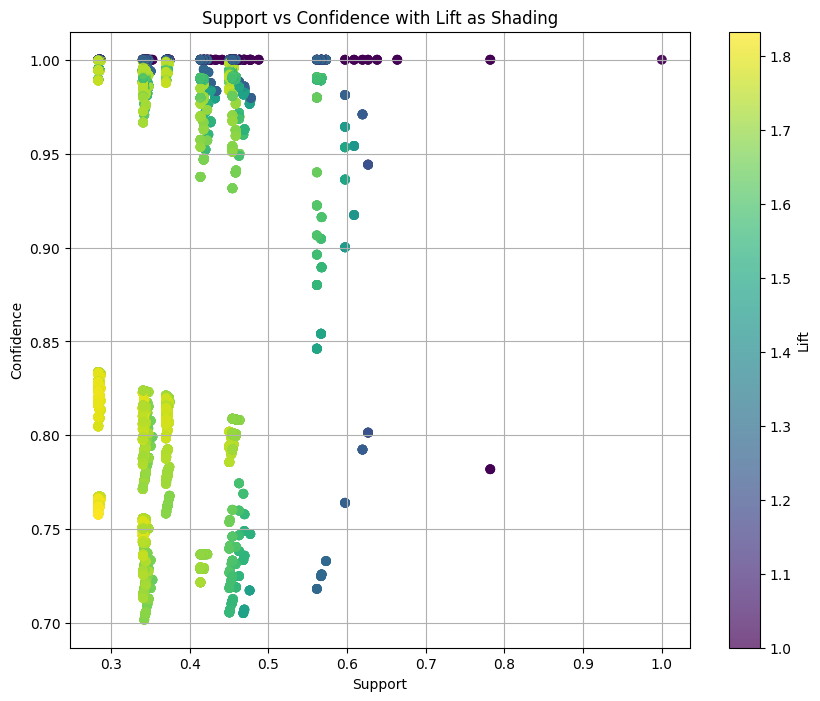

In [35]:
import matplotlib.pyplot as plt

# Plot support vs confidence with lift as shading
plt.figure(figsize=(10, 8))
plt.scatter(
    association_rules_df['support'], 
    association_rules_df['confidence'], 
    c=association_rules_df['lift'], 
    alpha=0.7
)
plt.colorbar(label='Lift')
plt.title('Support vs Confidence with Lift as Shading')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()
